In [11]:
# dependencies
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import time
import pickle
import data_utils
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from collections import Counter

sentence_size = 70

def read_sentences(file_path):
    sentences = []

    with open(file_path, 'r') as reader:
        for s in reader:
            sentences.append(s.strip())

    return sentences

def read_all_sentences(file_paths):
    all_sentences = []

    for file_path in file_paths:
        all_sentences += read_sentences(file_path)

    return all_sentences

def iteritems(dic):
    return iter([(key, dic[key]) for key in dic])

stopwords_=set(stopwords.words('english'))
print(len(stopwords_))
print(stopwords_)

def create_dataset(en_sentences, de_sentences):
    
    en_sentences = [[word.strip(',." ;:)(][?!').lower() for word in sentence.split()] for sentence in en_sentences]
    de_sentences = [[word.strip(',." ;:)(][?!').lower() for word in sentence.split()] for sentence in de_sentences]
    
    en_vocab_dict = Counter(word for sentence in en_sentences for word in sentence if (word not in stopwords_ and word is not ''))
    de_vocab_dict = Counter(word for sentence in de_sentences for word in sentence if (word not in stopwords_ and word is not ''))

    en_vocab = list(map(lambda x: x[0], sorted(en_vocab_dict.items(), key = lambda x: -x[1])))
    de_vocab = list(map(lambda x: x[0], sorted(de_vocab_dict.items(), key = lambda x: -x[1])))

    en_vocab = en_vocab[:25000]
    de_vocab = de_vocab[:40000]
    print(de_vocab[:50])

    start_idx = 2
    en_word2idx = dict([(word, idx+start_idx) for idx, word in enumerate(en_vocab)])
    en_word2idx['<ukn>'] = 0
    en_word2idx['<pad>'] = 1

    en_idx2word = dict([(idx, word) for word, idx in iteritems(en_word2idx)])


    start_idx = 4
    de_word2idx = dict([(word, idx+start_idx) for idx, word in enumerate(de_vocab)])
    de_word2idx['<ukn>'] = 0
    de_word2idx['<go>']  = 1
    de_word2idx['<eos>'] = 2
    de_word2idx['<pad>'] = 3

    de_idx2word = dict([(idx, word) for word, idx in iteritems(de_word2idx)])

    x = [[en_word2idx.get(word.strip(',." ;:)(][?!'), 0) for word in sentence if word not in stopwords_] for sentence in en_sentences]
    y = [[de_word2idx.get(word.strip(',." ;:)(][?!'), 0) for word in sentence if word not in stopwords_] for sentence in de_sentences]

    X = []
    Y = []
    for i in range(len(x)):
        n1 = len(x[i])
        n2 = len(y[i])
        n = n1 if n1 < n2 else n2 
        #if abs(n1 - n2) <= 0.3 * n:
        if n1 <= sentence_size and n2 <= sentence_size:
            X.append(x[i])
            Y.append(y[i])

    return X, Y, en_word2idx, en_idx2word, en_vocab, de_word2idx, de_idx2word, de_vocab

def save_dataset(file_path, obj):
    with open(file_path, 'wb') as f:
        pickle.dump(obj, f, -1)

def main():
    en_sentences = read_sentences('./Data/bible.en')
    de_sentences = read_sentences('./Data/bible.san')

    save_dataset('./Data/bible.pkl', create_dataset(en_sentences, de_sentences))
    save_dataset('./Data/bible2.pkl', create_dataset(de_sentences, en_sentences))

179
{'weren', 'were', 'whom', "doesn't", 'than', "should've", 'that', 'about', 'between', "isn't", 'ours', 'so', 're', 'we', 'myself', 'nor', "haven't", 'against', 'the', 'll', 'ma', 'hasn', 'she', "she's", 'how', 'shan', 'don', 'him', 'both', "wasn't", 'did', 'if', 'is', 'and', 'over', "didn't", 'd', 'our', 'below', 'do', 'only', 'isn', 'very', 'during', 'are', 'now', 'yours', 'few', 'its', "it's", 'ourselves', 'been', 'this', 'yourselves', 'her', 'a', 'can', 'above', 'i', 's', 'm', "needn't", "that'll", 'because', 'any', "hadn't", 'he', 'out', 'aren', 'those', 'where', 'at', 'should', 'being', 'same', 'which', 'down', 'too', "couldn't", 'y', 'needn', "weren't", 'who', 'when', 'for', "won't", 'to', 'couldn', 'mightn', 'theirs', 'such', "mightn't", 'while', 've', 'from', 'off', 'have', 'had', 'hers', 'it', 'other', 'most', 'his', 'but', 'once', 'an', "you'd", "mustn't", 'has', 'here', 'there', 'mustn', 'all', 'wasn', 'by', 'am', 'didn', "don't", "wouldn't", 'why', "hasn't", 'won', "sha

In [23]:
main()

['\\u0938', '\\u0928', '\\u0915\\u093f\\u0928\\u094d\\u0924\\u0941', '\\u0924\\u0938\\u094d\\u092f', '\\u0924\\u0926\\u093e', '\\u091a', '\\u0924\\u0924\\u0903', '\\u0924\\u0947', '\\u0924\\u0902', '\\u0939\\u0947', '\\u092f\\u0942\\u092f\\u0902', '\\u092e\\u092e', '\\u0915\\u093f\\u0902', '\\u0924\\u0930\\u094d\\u0939\\u093f', '\\u092f\\u0941\\u0937\\u094d\\u092e\\u093e\\u0915\\u0902', '\\u0924\\u0947\\u0937\\u093e\\u0902', '\\u0907\\u0924\\u093f', '\\u0924\\u094d\\u0935\\u0902', '\\u092f\\u0926\\u093f', '\\u0924\\u0924\\u094b', '\\u092f\\u0925\\u093e', '\\u0924\\u0935', '\\u0924\\u0947\\u0928', '\\u0924\\u093e\\u0928\\u094d', '\\u0917\\u0924\\u094d\\u0935\\u093e', '\\u0924\\u0925\\u093e', '\\u0915\\u0925\\u093e\\u0902', '\\u092f\\u0941\\u0937\\u094d\\u092e\\u093e\\u0928\\u094d', '\\u092f\\u094b', '\\u092f\\u0903', '\\u092f\\u0924\\u094b', '\\u092a\\u094d\\u0930\\u0924\\u093f', '\\u092f\\u0947', '\\u0924\\u0938\\u094d\\u092e\\u093e\\u0924\\u094d', '\\u0924\\u0924\\u094d', '\\u092a\\u0

In [6]:
def convert_sanskrit(uni):
    a = bytearray(uni, encoding = "utf-8").decode('unicode-escape')
    return a

In [7]:
# read dataset
def read_dataset(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f,encoding="utf_8")

X, Y, en_word2idx, en_idx2word, en_vocab, de_word2idx, de_idx2word, de_vocab = read_dataset('./Data/bible2.pkl')

In [8]:
#inspecting data
print('Sentence in Sanskrit - encoded:', X[0])
print('Sentence in English - encoded:', Y[0])
print('Decoded:\n------------------------')

for i in range(len(X[1])):
    print(convert_sanskrit(en_idx2word[X[1][i]]), end = " ")
    
print('\n')

for i in range(len(Y[1])):
    print(de_idx2word[Y[1][i]], end = " ")

Sentence in Sanskrit - encoded: [6411]
Sentence in English - encoded: [3210]
Decoded:
------------------------
इब्राहीमः सन्तानो दायूद् तस्य सन्तानो यीशुख्रीष्टस्तस्य पूर्व्वपुरुषवंशश्रेणी। 

<ukn> book of the generation of <ukn> <ukn>  the son of <ukn>  the son of <ukn>  

In [9]:
# data processing

# data padding
def data_padding(x, y, length = sentence_size):
    for i in range(len(x)):
        x[i] = x[i] + (length - len(x[i])) * [en_word2idx['<pad>']]
        y[i] = [de_word2idx['<go>']] + y[i] + [de_word2idx['<eos>']] + (length-len(y[i])) * [de_word2idx['<pad>']]

data_padding(X, Y)

# data splitting
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

print(len(X), len(Y), len(X_train), len(X_test), len(Y_train), len(Y_test))

del X
del Y

5493 5493 4943 550 4943 550


In [12]:
# build a model

input_seq_len = 10
output_seq_len = 12
en_vocab_size = len(en_vocab) + 2 # + <pad>, <ukn>
de_vocab_size = len(de_vocab) + 4 # + <pad>, <ukn>, <eos>, <go>

# placeholders
encoder_inputs = [tf.placeholder(dtype = tf.int32, shape = [None], name = 'encoder{}'.format(i)) for i in range(input_seq_len)]
decoder_inputs = [tf.placeholder(dtype = tf.int32, shape = [None], name = 'decoder{}'.format(i)) for i in range(output_seq_len)]

targets = [decoder_inputs[i+1] for i in range(output_seq_len-1)]
# add one more target
targets.append(tf.placeholder(dtype = tf.int32, shape = [None], name = 'last_target'))
target_weights = [tf.placeholder(dtype = tf.float32, shape = [None], name = 'target_w{}'.format(i)) for i in range(output_seq_len)]

# output projection
size = 512
w_t = tf.get_variable('proj_w', [de_vocab_size, size], tf.float32)
b = tf.get_variable('proj_b', [de_vocab_size], tf.float32)
w = tf.transpose(w_t)
output_projection = (w, b)

outputs, states = tf.contrib.legacy_seq2seq.embedding_attention_seq2seq(
                                            encoder_inputs,
                                            decoder_inputs,
                                            tf.contrib.rnn.BasicLSTMCell(size),
                                            num_encoder_symbols = en_vocab_size,
                                            num_decoder_symbols = de_vocab_size,
                                            embedding_size = 100,
                                            feed_previous = False,
                                            output_projection = output_projection,
                                            dtype = tf.float32)

In [13]:
# define our loss function

# sampled softmax loss - returns: A batch_size 1-D tensor of per-example sampled softmax losses
def sampled_loss(labels, logits):
    return tf.nn.sampled_softmax_loss(
                        weights = w_t,
                        biases = b,
                        labels = tf.reshape(labels, [-1, 1]),
                        inputs = logits,
                        num_sampled = 512,
                        num_classes = de_vocab_size)

# Weighted cross-entropy loss for a sequence of logits
loss = tf.contrib.legacy_seq2seq.sequence_loss(outputs, targets, target_weights, softmax_loss_function = sampled_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [14]:
# let's define some helper functions

# simple softmax function
def softmax(x):
    n = np.max(x)
    e_x = np.exp(x - n)
    return e_x / e_x.sum()

# feed data into placeholders
def feed_dict(x, y, batch_size = 64):
    feed = {}
    
    idxes = np.random.choice(len(x), size = batch_size, replace = False)
    
    for i in range(input_seq_len):
        feed[encoder_inputs[i].name] = np.array([x[j][i] for j in idxes], dtype = np.int32)
        
    for i in range(output_seq_len):
        feed[decoder_inputs[i].name] = np.array([y[j][i] for j in idxes], dtype = np.int32)
        
    feed[targets[len(targets)-1].name] = np.full(shape = [batch_size], fill_value = de_word2idx['<pad>'], dtype = np.int32)
    
    for i in range(output_seq_len-1):
        batch_weights = np.ones(batch_size, dtype = np.float32)
        target = feed[decoder_inputs[i+1].name]
        for j in range(batch_size):
            if target[j] == de_word2idx['<pad>']:
                batch_weights[j] = 0.0
        feed[target_weights[i].name] = batch_weights
        
    feed[target_weights[output_seq_len-1].name] = np.zeros(batch_size, dtype = np.float32)
    
    return feed

# decode output sequence
def decode_output(output_seq):
    words = []
    for i in range(output_seq_len):
        smax = softmax(output_seq[i])
        idx = np.argmax(smax)
        words.append(de_idx2word[idx])
    return words

In [15]:
# ops for projecting outputs
outputs_proj = [tf.matmul(outputs[i], output_projection[0]) + output_projection[1] for i in range(output_seq_len)]

In [16]:
# ops and hyperparameters
learning_rate = 0.01
batch_size = 64
steps = 200

# training op
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# init op
init = tf.global_variables_initializer()

# forward step
def forward_step(sess, feed):
    output_sequences = sess.run(outputs_proj, feed_dict = feed)
    return output_sequences

# training step
def backward_step(sess, feed):
    sess.run(optimizer, feed_dict = feed)

In [17]:
# we will use this list to plot losses through steps
losses = []

In [18]:
# let's train the model

# save a checkpoint so we can restore the model later 
all_saveable_inputs = tf.trainable_variables()
if optimizer in all_saveable_inputs:
    print('Removing the optimizer from the save list')
    all_saveable_inputs.remove(optimizer)
saver = tf.train.Saver(var_list=all_saveable_inputs)
checkpointsPath = './checkpoints430/'
restore = False
starting_step = 0

print('------------------TRAINING------------------')
with tf.Session() as sess:
    if (restore):
        print('Restoring')
        with open(checkpointsPath + 'checkpoint') as f:
            starting_step = int(re.match('model_checkpoint_path: "-([0-9]+)"', list(f)[0]).groups()[0]) + 1
        saver.restore(sess, tf.train.latest_checkpoint(checkpointsPath))
        print('Running from step {}'.format(starting_step))
    else:
        print('Running from scratch: generating random model parameters.')
        sess.run(init)
    
    print("Starting")
    t = time.time()
    for step in range(starting_step, starting_step + steps):
        feed = feed_dict(X_train, Y_train)
            
        backward_step(sess, feed)
        
        if step % 5 == 4 or step == 0:
        #if True:
            loss_value = sess.run(loss, feed_dict = feed)
            print('step: {}, loss: {}'.format(step, loss_value))
            losses.append(loss_value)
        
        if step % 20 == 19:
            saver.save(sess, checkpointsPath, global_step=step)
            print('Checkpoint is saved')
            
    print('Training time for {} steps: {}s'.format(steps, time.time() - t))

------------------TRAINING------------------
Running from scratch: generating random model parameters.
Starting
step: 0, loss: 8.069602966308594
step: 4, loss: 8.085697174072266
step: 9, loss: 8.065888404846191
step: 14, loss: 8.096610069274902
step: 19, loss: 8.080001831054688
Checkpoint is saved
step: 24, loss: 8.124706268310547
step: 29, loss: 8.09427547454834
step: 34, loss: 8.053258895874023
step: 39, loss: 7.981063365936279
Checkpoint is saved
step: 44, loss: 7.925826549530029
step: 49, loss: 7.863193511962891
step: 54, loss: 7.709896087646484
step: 59, loss: 7.19938325881958
Checkpoint is saved
step: 64, loss: 6.080378532409668
step: 69, loss: 6.90605354309082
step: 74, loss: 5.483562469482422
step: 79, loss: 5.742839336395264
Checkpoint is saved
step: 84, loss: 5.065009117126465
step: 89, loss: 5.024308204650879
step: 94, loss: 4.7655181884765625
step: 99, loss: 4.888178825378418
Checkpoint is saved
step: 104, loss: 4.572689056396484
step: 109, loss: 4.700695037841797
step: 114

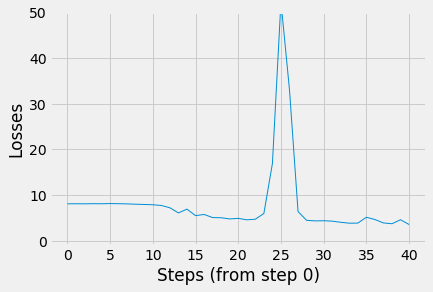

In [19]:
# plot losses

with plt.style.context('fivethirtyeight'):
    plt.plot(losses, linewidth = 1)
    plt.xlabel('Steps (from step {})'.format(starting_step))
    plt.ylabel('Losses')
    plt.ylim((-1, 50))

plt.show()

In [20]:
# let's test the model

with tf.Graph().as_default():
    
    # placeholders
    encoder_inputs = [tf.placeholder(dtype = tf.int32, shape = [None], name = 'encoder{}'.format(i)) for i in range(input_seq_len)]
    decoder_inputs = [tf.placeholder(dtype = tf.int32, shape = [None], name = 'decoder{}'.format(i)) for i in range(output_seq_len)]

    # output projection
    size = 512
    w_t = tf.get_variable('proj_w', [de_vocab_size, size], tf.float32)
    b = tf.get_variable('proj_b', [de_vocab_size], tf.float32)
    w = tf.transpose(w_t)
    output_projection = (w, b)
    
    # change the model so that output at time t can be fed as input at time t+1
    outputs, states = tf.contrib.legacy_seq2seq.embedding_attention_seq2seq(
                                                encoder_inputs,
                                                decoder_inputs,
                                                tf.contrib.rnn.BasicLSTMCell(size),
                                                num_encoder_symbols = en_vocab_size,
                                                num_decoder_symbols = de_vocab_size,
                                                embedding_size = 100,
                                                feed_previous = True, # <-----this is changed----->
                                                output_projection = output_projection,
                                                dtype = tf.float32)
    
    # ops for projecting outputs
    outputs_proj = [tf.matmul(outputs[i], output_projection[0]) + output_projection[1] for i in range(output_seq_len)]

    #let's translate these sentences     
#     en_sentences = ["\u0907\u092c\u094d\u0930\u093e\u0939\u0940\u092e\u0903 \u0938\u0928\u094d\u0924\u093e\u0928\u094b \u0926\u093e\u092f\u0942\u0926\u094d \u0924\u0938\u094d\u092f ",\
#                     '\u0938\u0928\u094d\u0924\u093e\u0928\u094b \u092f\u0940\u0936\u0941\u0916\u094d\u0930\u0940\u0937\u094d\u091f\u0938\u094d\u0924\u0938\u094d\u092f']
#     en_sentences_encoded = [[en_word2idx.get(word, 0) for word in en_sentence.split()] for en_sentence in en_sentences]
    en_sentences_encoded = X_test[:20]
    print(len(X_test))
    de_sentences_encoded = Y_test[:20]
    
    additional_en_sentences = ["\u0917\u0941\u0930\u0942\u0928\u0939\u0924\u094d\u0935\u093e \u0939\u093f \u092e\u0939\u093e\u0928\u0941\u092d\u093e\u0935\u093e\u0928\u094d\u0936\u094d\u0930\u0947\u092f\u094b \u092d\u094b\u0915\u094d\u0924\u0941\u0902 \u092d\u0948\u0915\u094d\u0937\u094d\u092f\u092e\u092a\u0940\u0939 \u0932\u094b\u0915\u0947 |\u0939\u0924\u094d\u0935\u093e\u0930\u094d\u0925\u0915\u093e\u092e\u093e\u0902\u0938\u094d\u0924\u0941 \u0917\u0941\u0930\u0942\u0928\u093f\u0939\u0948\u0935\u092d\u0941\u091e\u094d\u091c\u0940\u092f \u092d\u094b\u0917\u093e\u0928\u094d \u0930\u0941\u0927\u093f\u0930\u092a\u094d\u0930\u0926\u093f\u0917\u094d\u0927\u093e\u0928\u094d",
                              "\u0935\u093f\u0939\u093e\u092f \u0915\u093e\u092e\u093e\u0928\u094d\u092f: \u0938\u0930\u094d\u0935\u093e\u0928\u094d\u092a\u0941\u092e\u093e\u0902\u0936\u094d\u091a\u0930\u0924\u093f \u0928\u093f:\u0938\u094d\u092a\u0943\u0939: |\u0928\u093f\u0930\u094d\u092e\u092e\u094b \u0928\u093f\u0930\u0939\u0919\u094d\u0915\u093e\u0930: \u0938 \u0936\u093e\u0928\u094d\u0924\u093f\u092e\u0927\u093f\u0917\u091a\u094d\u091b\u0924\u093f || "]
    en_sentences_encoded += [[en_word2idx.get(word, 0) for word in en_sentence.split()] for en_sentence in additional_en_sentences]
    additional_de_sentences = ["It would be better to live in this world by begging, than to enjoy life by killing these noble elders, who are my teachers. If we kill them, the wealth and pleasures we enjoy will be tainted with blood.",
                              "That person, who gives up all material desires and lives free from a sense of greed, proprietorship, and egoism, attains perfect peace."]
    de_sentences_encoded += [[de_word2idx.get(word, 0) for word in de_sentence.split()] for de_sentence in additional_de_sentences]
    
    # padding to fit encoder input
    for i in range(len(en_sentences_encoded)):
        en_sentences_encoded[i] += (15 - len(en_sentences_encoded[i])) * [en_word2idx['<pad>']]
    
    # restore all variables - use the last checkpoint saved
    saver = tf.train.Saver()
    path = tf.train.latest_checkpoint(checkpointsPath)
    
    with tf.Session() as sess:
        # restore
        saver.restore(sess, path)
        
        # feed data into placeholders
        feed = {}
        for i in range(input_seq_len):
            feed[encoder_inputs[i].name] = np.array([en_sentences_encoded[j][i] for j in range(len(en_sentences_encoded))], dtype = np.int32)
            
        feed[decoder_inputs[0].name] = np.array([de_word2idx['<go>']] * len(en_sentences_encoded), dtype = np.int32)
        
        # translate
        output_sequences = sess.run(outputs_proj, feed_dict = feed)
        
        # decode seq.
        for i in range(len(en_sentences_encoded)):
            print('{}.\n--------------------------------'.format(i+1))
            ouput_seq = [output_sequences[j][i] for j in range(output_seq_len)]
            #decode output sequence
            words = decode_output(ouput_seq)
        
            print(" ". join([convert_sanskrit(en_idx2word[word]) for word in en_sentences_encoded[i]]))
            print(" ". join([(en_idx2word[word]) for word in en_sentences_encoded[i]]))
            print('Translation: ', end = " ")
            for j in range(len(words)):
                if words[j] not in ['<eos>', '<pad>', '<go>']:
                    print((words[j]), end = " ")
            print()
            print('   Expected: ', end = " ")
            for j in range(len(de_sentences_encoded[i])):
                if de_idx2word[de_sentences_encoded[i][j]] not in ['<eos>', '<pad>', '<go>']:
                    print((de_idx2word[de_sentences_encoded[i][j]]), end = " ")
            
            print('\n--------------------------------')

550
INFO:tensorflow:Restoring parameters from ./checkpoints430/-199
1.
--------------------------------
अथ यीशुश्चतुर्दिशो निरीक्ष्य शिष्यान् अवादीत्  धनिलोकानाम् ईश्वरराज्यप्रवेशः कीदृग् दुष्करः। <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
\u0905\u0925 \u092f\u0940\u0936\u0941\u0936\u094d\u091a\u0924\u0941\u0930\u094d\u0926\u093f\u0936\u094b \u0928\u093f\u0930\u0940\u0915\u094d\u0937\u094d\u092f \u0936\u093f\u0937\u094d\u092f\u093e\u0928\u094d \u0905\u0935\u093e\u0926\u0940\u0924\u094d  \u0927\u0928\u093f\u0932\u094b\u0915\u093e\u0928\u093e\u092e\u094d \u0908\u0936\u094d\u0935\u0930\u0930\u093e\u091c\u094d\u092f\u092a\u094d\u0930\u0935\u0947\u0936\u0903 \u0915\u0940\u0926\u0

# This model can be improved by using more training steps, better dataset or even with better selection of hyperparameters 

In [18]:
convert_sanskrit(r'\u0935\u093f\u0939\u093e\u092f \u0915\u093e\u092e\u093e\u0928\u094d\u092f: \u0938\u0930\u094d\u0935\u093e\u0928\u094d\u092a\u0941\u092e\u093e\u0902\u0936\u094d\u091a\u0930\u0924\u093f \u0928\u093f:\u0938\u094d\u092a\u0943\u0939: |\u0928\u093f\u0930\u094d\u092e\u092e\u094b \u0928\u093f\u0930\u0939\u0919\u094d\u0915\u093e\u0930: \u0938 \u0936\u093e\u0928\u094d\u0924\u093f\u092e\u0927\u093f\u0917\u091a\u094d\u091b\u0924\u093f || ')

'विहाय कामान्य: सर्वान्पुमांश्चरति नि:स्पृह: |निर्ममो निरहङ्कार: स शान्तिमधिगच्छति || '